## [Understanding the 3 most common loss functions for Machine Learning Regression](https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3)

### 1. MSE

To calculate the MSE, you take the difference between your model’s predictions and the ground truth, square it, and average it out across the whole dataset.

<p style="text-align:center;font-size:26px">MSE = $\frac{1}{N} \Sigma_{i=1}^{N} (y_i - \hat(y_i)^2$</p>

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss

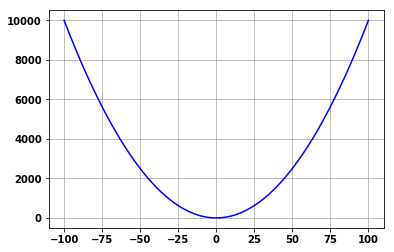

In [33]:
x_vals = np.arange(-100, 100, 0.01)
y_vals_mse = np.square(x_vals)

plt.plot(x_vals, y_vals_mse, "blue")
plt.grid(True, which="major")
plt.show()

**Advantage:** The MSE is great for ensuring that our trained model has no outlier predictions with huge errors, since the MSE puts larger weight on theses errors due to the squaring part of the function.

**Disadvantage:** If our model makes a single very bad prediction, the squaring part of the function magnifies the error. Yet in many practical cases we don’t care much about these outliers and are aiming for more of a well-rounded model that performs good enough on the majority.

### 2. Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) is only slightly different in definition from the MSE, but interestingly provides almost exactly opposite properties!

<p style="text-align:center;font-size:26px">MAE = $\frac{1}{N} \Sigma_{i=1}^{N} |y_i - \hat(y_i)|$</p>

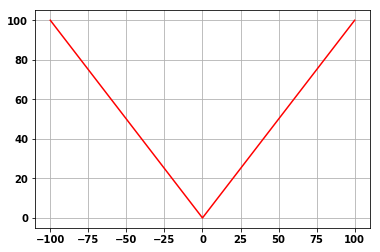

In [34]:
def mae(y_pred, y_true):
    abs_error = np.abs(y_pred - y_true)
    sum_abs_error = np.sum(abs_error)
    mae = sum_abs_error / y_pred.size
    return mae

x_vals = np.arange(-100, 100, 0.01)
y_vals_mae = np.abs(x_vals)

plt.plot(x_vals, y_vals_mae, "red")
plt.grid(True, which="major")
plt.show()

**Advantage:** The beauty of the MAE is that its advantage directly covers the MSE disadvantage. Since we are taking the absolute value, all of the errors will be weighted on the same linear scale. Thus, unlike the MSE, we won’t be putting too much weight on our outliers and our loss function provides a generic and even measure of how well our model is performing.

**Disadvantage:** If we do in fact care about the outlier predictions of our model, then the MAE won’t be as effective. The large errors coming from the outliers end up being weighted the exact same as lower errors. This might results in our model being great most of the time, but making a few very poor predictions every so-often.

### 3. Huber Loss

Now we know that the MSE is great for learning outliers while the MAE is great for ignoring them. But what about something in the middle?

Consider an example where we have a dataset of 100 values we would like our model to be trained to predict. Out of all that data, 25% of the expected values are 5 while the other 75% are 10.

An MSE loss wouldn’t quite do the trick, since we don’t really have “outliers”; 25% is by no means a small fraction. On the other hand we don’t necessarily want to weight that 25% too low with an MAE. Those values of 5 aren’t close to the median (10 — since 75% of the points have a value of 10), but they’re also not really outliers.

Our solution?

The Huber Loss Function.

The Huber Loss offers the best of both worlds by balancing the MSE and MAE together.

<img src="huber_loss.png">

What this equation essentially says is: for loss values less than delta, use the MSE; for loss values greater than delta, use the MAE. This effectively combines the best of both worlds from the two loss functions!

Using the MAE for larger loss values mitigates the weight that we put on outliers so that we still get a well-rounded model. At the same time we use the MSE for the smaller loss values to maintain a quadratic function near the centre.

This has the effect of magnifying the loss values as long as they are greater than 1. Once the loss for those data points dips below 1, the quadratic function down-weights them to focus the training on the higher-error data points.

In [35]:
# Huber loss function
def huber_loss(y_pred, y_true, delta=1.0):
    huber_mse = 0.5*(y_pred-y_true)**2
    huber_mae = delta * (np.abs(y_pred-y_true) - 0.5 * delta)
    return np.where(np.abs(y_pred-y_true) <= delta, huber_mse, huber_mae)

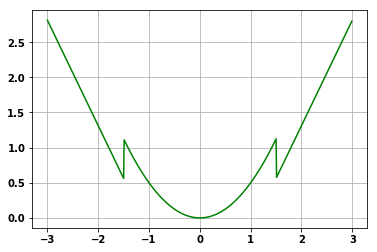

In [36]:
x_vals = np.arange(-3, 3, 0.01)

delta = 1.5
huber_mse = 0.5*np.square(x_vals)
huber_mae = delta * (np.abs(x_vals) - 0.5 * (delta**2) )
y_vals_huber = np.where(np.abs(x_vals) <= delta, huber_mse, huber_mae)

plt.plot(x_vals, y_vals_huber, "green")
plt.grid(True, which="major")
plt.show()

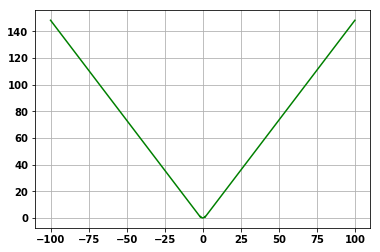

In [37]:
x_vals = np.arange(-100, 100, 0.01)

delta = 1.5
huber_mse = 0.5*np.square(x_vals)
huber_mae = delta * (np.abs(x_vals) - 0.5 * (delta**2) )
y_vals_huber = np.where(np.abs(x_vals) <= delta, huber_mse, huber_mae)

plt.plot(x_vals, y_vals_huber, "green")
plt.grid(True, which="major")
plt.show()

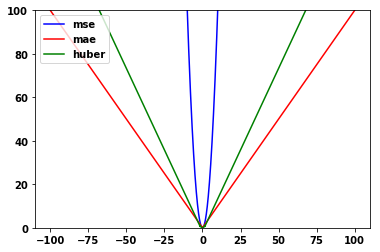

In [40]:
fig = plt.figure()
axes = plt.axes()

plt.plot(x_vals, y_vals_mse, "blue", label='mse')
plt.plot(x_vals, y_vals_mae, "red", label='mae')
plt.plot(x_vals, y_vals_huber, "green", label='huber');

plt.legend(loc='upper left')
axes.set_ylim([0, 100])

plt.show()

Notice how we’re able to get the Huber loss right in-between the MSE and MAE.

You’ll want to use the Huber loss any time you feel that you need a balance between giving outliers some weight, but not too much. For cases where outliers are very important to you, use the MSE! For cases where you don’t care at all about the outliers, use the MAE!